In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

##  THE DATASETS ARE IMPORTED AND EXPLORATORY DATA ANALYSIS IS PERFORMED

In [3]:
customer_demographic_data = pd.read_excel("/Users/admin/Desktop/Data Analyst - Scientist Career/Data Science - Analytics/KPMG Data Analytics Internship/CustomerDemographic.xlsx")

In [4]:
transactions_data = pd.read_excel("/Users/admin/Desktop/Data Analyst - Scientist Career/Data Science - Analytics/KPMG Data Analytics Internship/Transactions.xlsx")

In [5]:
customer_address_data = pd.read_excel("/Users/admin/Desktop/Data Analyst - Scientist Career/Data Science - Analytics/KPMG Data Analytics Internship/CustomerAddress.xlsx")

## DATA MERGING IS PERFORMED ON THE DATASETS

Data is merged based on the customer_Id in the master data set which is the customer_demographic_data

In [6]:
merged_data = pd.merge(customer_demographic_data, transactions_data, on='customer_id')
merged_data = pd.merge(merged_data, customer_address_data, on='customer_id')

### DATA IS FILTERED TO CONTAIN ONLY TRANSACTIONS FOR PAST 3 MONTHS

In [7]:
df= merged_data.loc[(merged_data['transaction_date'] >= '2017-10-01')
                          & (merged_data['transaction_date'] < '2017-12-31')]
pd.set_option('display.max_columns', None)
df.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0,14931,31,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,37337.0,060 Morning Avenue,2016,New South Wales,Australia,10
2,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0,16423,9,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0,060 Morning Avenue,2016,New South Wales,Australia,10
16,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,7692,39,2017-12-14,0.0,Approved,Giant Bicycles,Standard,medium,large,1812.75,582.48,39526.0,17979 Del Mar Point,2448,New South Wales,Australia,4
22,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,Yes,13.0,5749,54,2017-10-27,1.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,40410.0,9 Oakridge Court,3216,VIC,Australia,9


### EXPLORATORY DATA ANALYSIS ON THE NEW DATA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5074 entries, 0 to 19955
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          5074 non-null   int64         
 1   first_name                           5074 non-null   object        
 2   last_name                            4926 non-null   object        
 3   gender                               5074 non-null   object        
 4   past_3_years_bike_related_purchases  5074 non-null   int64         
 5   DOB                                  4963 non-null   object        
 6   job_title                            4466 non-null   object        
 7   job_industry_category                4253 non-null   object        
 8   wealth_segment                       5074 non-null   object        
 9   deceased_indicator                   5074 non-null   object        
 10  owns_car   

### DATA CLEANING ACTIVITIES

1. All records with missing value are removed from the data.
2. The gender column is formated to make the gender types consistent throughout
3. The DOB column is formatted.
4. In the product_id column, rows with product_id = 0 are removed from the dataset

### FEATURE ENGINEERING PERFORMED
1. Transforming the age group in to young, middle-age and old


In [9]:
df["online_order"]= df["online_order"].astype(str)

/var/folders/wx/7dmr67zx5b3cbyb9xt2zx31w0000gn/T/ipykernel_836/1494413624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["online_order"]= df["online_order"].astype(str)


In [10]:
#dropping columns with online order as nan
df = df.loc[(df["online_order"]!= "nan")]

In [11]:
df.dropna(how = "any", inplace=True)

In [12]:
df["gender"].unique()

array(['F', 'Female', 'Male', 'Femal'], dtype=object)

In [13]:
#iterate through the gender column to change the gender type
#"U" will be used to represent unknown

df["gender"].replace( 'F','Female',inplace=True)
df["gender"].replace('Femal', 'Female', inplace=True)
df["gender"].replace('Male',"Male", inplace=True)

In [14]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
df["DOB"] = pd.to_datetime(df["DOB"])

In [16]:
df = df[df['product_id'] != 0]

In [17]:
df["state"].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [18]:
df["state"].replace('New South Wales', 'NSW' ,inplace=True)
df["state"].replace('Victoria', 'VIC', inplace=True)

## DATA VISUALIZATION

In [53]:
reference_date = pd.Timestamp('2021-01-01')

# Calculate the age in days from the reference date
df["age_days"] = (reference_date - df["DOB"]).dt.days

bins = np.linspace(min(df["age_days"]), max(df["age_days"]), 4)
group_names = ["young", "middle_age", "" "old"]

# Cut the data into age categories
df["age_category"] = pd.cut(df["age_days"], bins, labels=group_names, include_lowest=True)

df["age_category"] = df["age_category"].astype(str)

df = df.drop("age_days", axis=1)


In [120]:
df_age = df.loc[df["age_category"]== "young"]
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation,age_category,customer_retention_days,product_profit
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1970-01-01 00:00:00.000000094,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,NSW,Australia,10,old,83,110.56
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1970-01-01 00:00:00.000014931,31,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,37337.0,060 Morning Avenue,2016,NSW,Australia,10,old,74,57.73
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1970-01-01 00:00:00.000016423,9,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0,060 Morning Avenue,2016,NSW,Australia,10,old,69,75.14
40,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1970-01-01 00:00:00.000004233,36,2017-10-13,0.0,Approved,Solex,Standard,low,medium,945.04,507.58,40336.0,97736 7th Trail,2023,NSW,Australia,12,middle_age,12,437.46
52,12,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0,1970-01-01 00:00:00.000014250,34,2017-10-24,1.0,Approved,Norco Bicycles,Road,high,large,774.53,464.72,37698.0,44339 Golden Leaf Alley,4557,QLD,Australia,4,young,23,309.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19906,3488,Cristobal,Whitrod,Male,63,1975-08-07,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,9.0,1970-01-01 00:00:00.000000871,38,2017-10-22,0.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,35560.0,42293 Banding Plaza,2136,NSW,Australia,10,middle_age,21,751.02
19922,3492,Urbanus,Redding,Male,83,1966-01-27,Civil Engineer,Manufacturing,Mass Customer,N,No,19.0,1970-01-01 00:00:00.000015591,11,2017-10-11,0.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,39298.0,2986 Holmberg Circle,3021,VIC,Australia,9,middle_age,10,509.97
19931,3494,Robers,Richen,Male,72,1998-12-24,Account Representative IV,Argiculture,High Net Worth,N,No,1.0,1970-01-01 00:00:00.000004369,82,2017-12-26,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,42404.0,35 Chive Alley,2033,NSW,Australia,10,young,86,709.34
19936,3495,Constantine,Frissell,Female,57,1987-07-12,Programmer III,Financial Services,High Net Worth,N,No,8.0,1970-01-01 00:00:00.000004395,32,2017-12-12,1.0,Approved,Giant Bicycles,Standard,high,medium,1179.00,707.40,35667.0,1 Dayton Park,2767,NSW,Australia,9,young,72,471.60


### PLOTTING ALL CATEGORIAL FIELD

In [25]:
object_cols = df.select_dtypes(include='object')
object_cols = object_cols.drop(["first_name", "last_name","job_title",'address',  'order_status', "country"], axis=1)
object_cols = list(object_cols.select_dtypes(include='object'))
object_cols

['gender',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'online_order',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'state',
 'age_category']

In [26]:
df["product_id"]= df["product_id"].astype(str)

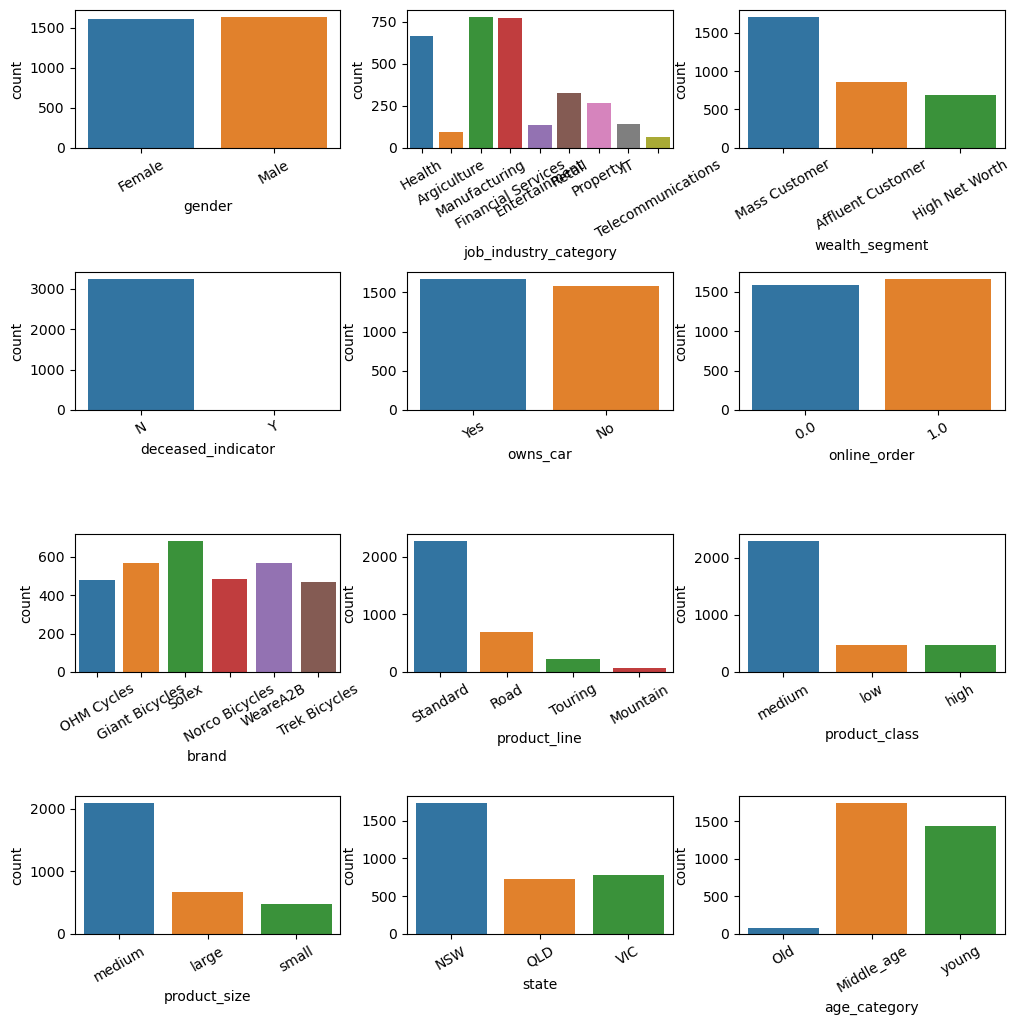

In [29]:
cat_features = df[object_cols]
fig, ax = plt.subplots(4, 3, figsize=(12, 12))

for i, subplots in zip(cat_features, ax.flatten()):
    sns.countplot(x=i, data=df, ax=subplots)
    subplots.set_xticklabels(subplots.get_xticklabels(), rotation=30)
    fig.subplots_adjust(hspace=0.9, wspace=0.25)

plt.savefig("count_of_category_data.png", dpi=100)
plt.show()

### VISUALIZING PROFIT BY BRAND

In [ ]:
df["product_profit"] = df["list_price"].astype(float) - df["standard_cost"].astype(float)

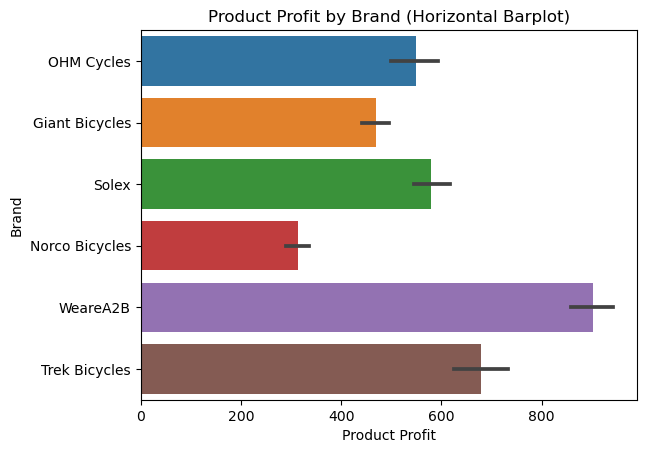

In [108]:

sns.barplot(x=df2['product_profit'], y=df2['brand'], data=df2, orient='h')
plt.xlabel('Product Profit')
plt.ylabel('Brand')
plt.title('Product Profit by Brand (Horizontal Barplot)')
plt.savefig("proft_by_brand.png", dpi=100)
plt.show()

### MODELLING (NAIVE BAYES CLASSIFICATION METHOD TO PREDICT WHICH BRAND ARE CUSTOMERS LIKELY TO BY BASED ON KEY ATTRIBUTES)

#### Assumptions:

1. We assume that no pair of features are dependent.
2. Each feature is given the same importance.

In [125]:
# Importing the dataset  
df2=df.drop(['customer_id',
 'first_name',
 'last_name',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'transaction_id',
 'product_id',
 'transaction_date',
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 "gender",
 'list_price',
 'standard_cost',
 'product_first_sold_date',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation',
 'customer_retention_days',
 'product_profit'], axis="columns")
df2

,job_industry_category,wealth_segment,age_category
0,Health,Mass Customer,old
1,Health,Mass Customer,old
2,Health,Mass Customer,old
40,Argiculture,Affluent Customer,middle_age
52,Manufacturing,Mass Customer,young
...,...,...,...
19906,Manufacturing,Mass Customer,middle_age
19922,Manufacturing,Mass Customer,middle_age
19931,Argiculture,High Net Worth,young
19936,Financial Services,High Net Worth,young


In [126]:
x = pd.get_dummies(df2)
x.isna().sum()

job_industry_category_Argiculture           0
job_industry_category_Entertainment         0
job_industry_category_Financial Services    0
job_industry_category_Health                0
job_industry_category_IT                    0
job_industry_category_Manufacturing         0
job_industry_category_Property              0
job_industry_category_Retail                0
job_industry_category_Telecommunications    0
wealth_segment_Affluent Customer            0
wealth_segment_High Net Worth               0
wealth_segment_Mass Customer                0
age_category_middle_age                     0
age_category_old                            0
age_category_young                          0
dtype: int64

In [127]:
y=df["online_order"]
y.isna().sum()

0

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets (assuming you have X and y defined)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Define and train your model
model = RandomForestClassifier()  # You can replace this with the desired model
model.fit(X_train, y_train)

# Now, you can make predictions using the trained model
y_pred = model.predict(X_test) 

In [129]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [130]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.5122850122850123
F1 Score: 0.5225766637531343
